    LaTeX генератор таблиц (наконец-то полноценный, ориентация вертикальная):

In [5]:
print ("Введите данные:")
no_parse_data = input().split(' ')
data = [i_stolb.split() for i_stolb in no_parse_data]
# print (data)

output = "\hline\n"
for i_str in range (len (data[0])):
    for i_stolb in range (len (data)):
        output += data[i_stolb][i_str] + " & "
    output = output[0:-2] + "\\\\ \hline\n"

print (output)

Введите данные:
\hline
0 & 91 & 6.48 & 108.37 \\ \hline
3.37 & 91.25 & 6.26 & 106.48 \\ \hline
3.72 & 93.25 & 5.92 & 105.1 \\ \hline
4.01 & 94.93 & 5.52 & 103.02 \\ \hline
4.47 & 97.53 & 5.34 & 102.05 \\ \hline
4.76 & 99.15 & 4.87 & 99.25 \\ \hline
5.25 & 102.05 & 4.64 & 98.05 \\ \hline
5.47 & 103.33 & 3.8 & 93.55 \\ \hline
5.78 & 105.12 & 3.5 & 92.02 \\ \hline
6.28 & 107.15 & 3.22 & 90.25 \\ \hline
6.48 & 108.37 & 2.76 & 87.67 \\ \hline
--- & --- & 2.26 & 84.97 \\ \hline
--- & --- & 1.41 & 80.52 \\ \hline
--- & --- & 0 & 75.4 \\ \hline



    А вот горизонтальная:

In [76]:
print ("Введите данные:")
data = input()
data = data.replace (' ',  "\\\\ \hline\n")
data = data.replace ('\t', " & ")
print ("\hline", data, "\\\\ \hline\n", sep = '\n')

Введите данные:
\hline
700 & 125 & 175 & 225 & 275 & 325 & 375\\ \hline
51 & 953 & 960 & 904 & 812 & 707 & 612
\\ \hline



    Теперь основная часть:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
class MNK_info:
    def __init__ (self, k = 0, b = 0, sigma_k = 0, sigma_b = 0):
        self.k = k
        self.b = b
        self.sigma_k = sigma_k
        self.sigma_b = sigma_b

    def Print (self):
        print ("\t" + "k = " + str (self.k),
               "\t" + "b = " + str (self.b),
               "\t" + "sigma_k = " + str (self.sigma_k),
               "\t" + "sigma_b = " + str (self.sigma_b),
               sep = "\n")

def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)
    
    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x
    
    sigma_k = 1 / np.sqrt (len  (x)) * np.sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * np.sqrt (mid_x_pow2 - mid_x ** 2)
    
    return MNK_info (k, b, sigma_k, sigma_b)

Данные

Гейгер:

In [6]:
t_gei = np.array (list (map (float, input ("t: ").split())))
N_gei = np.array (list (map (float, input ("N: ").split())))
d_gei = np.array (list (map (float, input ("d: ").split())))

N_div_T_gei = N_gei / t_gei
# d_gei += 10

In [30]:
# Сортируем, т.к. не по порядку

sorting_arr = zip (N_div_T_gei, d_gei)
sorting_arr = sorted (sorting_arr, key = lambda x: x[1])
N_div_T_gei, d_gei = zip (*sorting_arr)

# вычматы style, см. https://github.com/AndreyVV-100/Computational-Mathematics/tree/main/Sem1-Task1
diff_N_x = [-(N_div_T_gei[1] - N_div_T_gei[0]) / (d_gei[1] - d_gei[0])] # 0th elem
# [1; N-2]
diff_N_x += [-(N_div_T_gei[i_elem + 1] - N_div_T_gei[i_elem - 1]) / (d_gei[i_elem + 1] - d_gei[i_elem - 1]) for i_elem in range (1, len (d_gei) - 1)]
diff_N_x += [-(N_div_T_gei[-1] - N_div_T_gei[-2]) / (d_gei[-1] - d_gei[-2])] # (N-1)th elem

# Теперь прямая для Rэ, промежутки сами ищите

seg_d_geig = d_gei[6:12]
seg_N_geig = N_div_T_gei[6:12]

geig_MNK = MNK (seg_d_geig, seg_N_geig)
R_e_geig = -geig_MNK.b / geig_MNK.k
delta_R_e_geig = R_e_geig * np.sqrt ((geig_MNK.sigma_b / geig_MNK.b) ** 2 + (geig_MNK.sigma_k / geig_MNK.k) ** 2)
print ("Rэ = ", R_e_geig, " +- ", delta_R_e_geig)

Rэ =  19.162364029644273  +-  1.0922499388067508


Сцилляционный счётчик:

In [61]:
p_atm = 747
p_sc = p_atm - np.array (list (map (float, input ("p: ").split())))
N_sc = np.array (list (map (float, input ("N: ").split())))
t_sc = np.array (list (map (float, input ("t: ").split())))

N_div_T_sc = N_sc / p_sc

In [95]:
# Сортируем, т.к. не по порядку

sorting_arr = zip (N_div_T_sc, p_sc)
sorting_arr = sorted (sorting_arr, key = lambda x: x[1])
N_div_T_sc, p_sc = zip (*sorting_arr)

# вычматы style, см. https://github.com/AndreyVV-100/Computational-Mathematics/tree/main/Sem1-Task1
diff_N_p = [-120*(N_div_T_sc[1] - N_div_T_sc[0]) / (p_sc[1] - p_sc[0])] # 0th elem
# [1; N-2]
diff_N_p += [-120*(N_div_T_sc[i_elem + 1] - N_div_T_sc[i_elem - 1]) / (p_sc[i_elem + 1] - p_sc[i_elem - 1]) for i_elem in range (1, len (p_sc) - 1)]
diff_N_p += [-120*(N_div_T_sc[-1] - N_div_T_sc[-2]) / (p_sc[-1] - p_sc[-2])] # (N-1)th elem

# Теперь прямая для Rэ, промежутки сами ищите

seg_p_sc = p_sc[3:8]
seg_N_sc = N_div_T_sc[3:8]

sc_MNK = MNK (seg_p_sc, seg_N_sc)
p_e_sc = -sc_MNK.b / sc_MNK.k
delta_p_e_sc = p_e_sc * np.sqrt ((sc_MNK.sigma_b / sc_MNK.b) ** 2 + (sc_MNK.sigma_k / sc_MNK.k) ** 2)
print ("pэ = ", p_e_sc, " +- ", delta_p_e_sc)

pэ =  227.7106365451574  +-  48.007542826442645


Ионизационная камера:

In [77]:
p_atm = 747
I_ion = np.array (list (map (float, input ("I: ").split())))
p_ion = p_atm - np.array (list (map (float, input ("p: ").split())))

In [97]:
# Сортируем, т.к. не по порядку

sorting_arr = zip (I_ion, p_ion)
sorting_arr = sorted (sorting_arr, key = lambda x: x[1])
I_ion, p_ion = zip (*sorting_arr)

seg_I_ion1 = I_ion[6:15]
seg_p_ion1 = p_ion[6:15]
ion1_MNK = MNK (seg_p_ion1, seg_I_ion1)

seg_I_ion2 = I_ion[-6:-1]
seg_p_ion2 = p_ion[-6:-1]
ion2_MNK = MNK (seg_p_ion2, seg_I_ion2)

p_cross_ion = - (ion1_MNK.b - ion2_MNK.b) / (ion1_MNK.k - ion2_MNK.k)
delta_p_ion = p_cross_ion * np.sqrt (((ion1_MNK.sigma_b + ion2_MNK.sigma_b)/(ion1_MNK.b - ion2_MNK.b)) ** 2 +((ion1_MNK.sigma_k + ion2_MNK.sigma_k)/(ion1_MNK.k - ion2_MNK.k)) ** 2)
print ("p_cross_ion = ", p_cross_ion, " +- ", delta_p_ion)

p_cross_ion =  554.3153612042815  +-  12.08596278645175


Графики

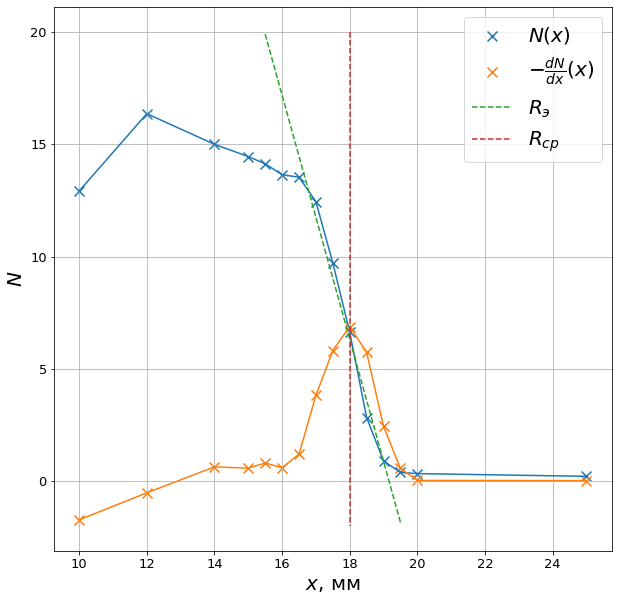

In [73]:
plt.rc('font', size = 13)

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.scatter (d_gei, N_div_T_gei, marker = 'x', s=100, label = "$N(x)$")
ax.plot (d_gei, N_div_T_gei)

ax.scatter (d_gei, diff_N_x, marker = 'x', s=100, label = "$-\\frac{dN}{dx}(x)$")
ax.plot (d_gei, diff_N_x)

# Подбирайте точки сами для Rэ
# Интересно, для кого я пишу это в три часа ночи? Напиши, если реально читаешь это.
linear = lambda x: geig_MNK.k * x + geig_MNK.b
ax.plot ([d_gei[4], d_gei[12]], [linear (d_gei[4]), linear (d_gei[12])], "--", label = "$R_э$")

# Rcр
ax.plot ([18, 18], [20, -2], "--", label = "$R_{ср}$") # тут я уже совсем обнаглел

ax.set_xlabel ('$x$, мм', fontsize = 20)
ax.set_ylabel ('$N$', fontsize = 20)

plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/geig.pdf")

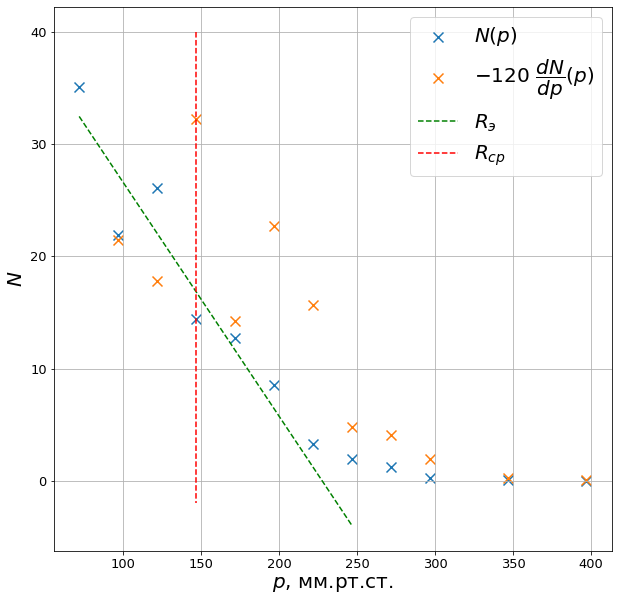

In [87]:
plt.rc('font', size = 13)

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

# Почему такой промежуток? А знаете почему? Думаете, что у нас руки кривые?
# Нет, просто опыт - говно! А мы пытаемся из него сделать что-то интересное, но у нас не получается!
ax.scatter (p_sc[3:15], N_div_T_sc[3:15], marker = 'x', s=100, label = "$N (p)$")
# ax.plot (p_sc[3:14], N_div_T_sc[3:14])

ax.scatter (p_sc[4:15], diff_N_p[4:15], marker = 'x', s=100, label = "$-120~ \\dfrac{dN}{dp} (p)$")
# ax.plot (p_sc[4:14], diff_N_p[4:14])

# pэ
linear = lambda x: sc_MNK.k * x + sc_MNK.b
ax.plot ([p_sc[3], p_sc[10]], [linear (p_sc[3]), linear (p_sc[10])], "--", label = "$R_э$", color = "green")

# p cр
ax.plot ([147, 147], [40, -2], "--", label = "$R_{ср}$", color = "red") # тут я уже совсем обнаглел

ax.set_xlabel ('$p$, мм.рт.ст.', fontsize = 20)
ax.set_ylabel ('$N$', fontsize = 20)

plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/sc.pdf")

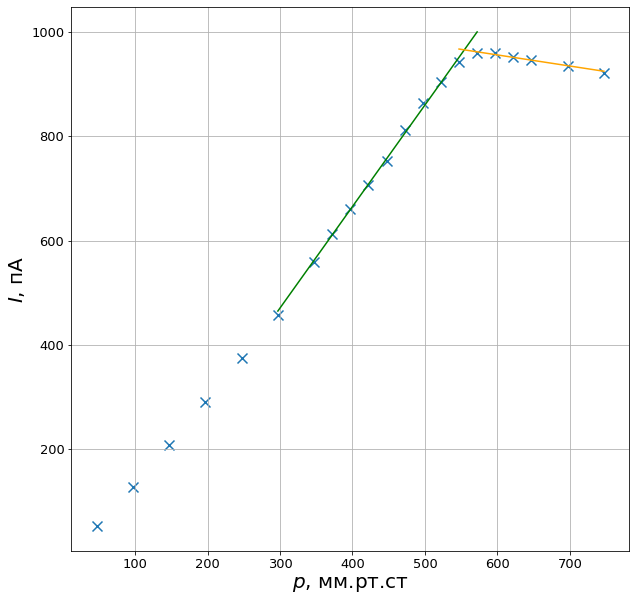

In [93]:
plt.rc('font', size = 13)

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.scatter (p_ion, I_ion, marker = 'x', s=100)
# ax.plot (p_ion, I_ion)

linear = lambda x: ion1_MNK.k * x + ion1_MNK.b
ax.plot ([p_ion[5], p_ion[15]], [linear (p_ion[5]), linear (p_ion[15])], color = "green")

linear = lambda x: ion2_MNK.k * x + ion2_MNK.b
ax.plot ([p_ion[-1], p_ion[-7]], [linear (p_ion[-1]), linear (p_ion[-7])], color = "orange")

ax.set_xlabel ('$p$, мм.рт.ст', fontsize = 20)
ax.set_ylabel ('$I$, пА', fontsize = 20)

# plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/ion.pdf")